In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv


In [2]:
data=pd.read_csv('/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')

In [3]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,20491.0,3.952223,1.23303,1.0,3.0,4.0,5.0,5.0


In [13]:
import pandas as pd

# Assuming 'data' is your DataFrame
count = data.isnull().sum().sort_values(ascending=False)
percentage = (data.isnull().sum() / len(data) * 100).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys=['Count', 'Percentage'])

print('Count and percentage of missing value')
print(missing_data)



Count and percentage of missing value
        Count  Percentage
Review      0         0.0
Rating      0         0.0


Percentage for default sentiment
Sentiment
Happy        84.32
Not Happy    15.68
Name: proportion, dtype: float64


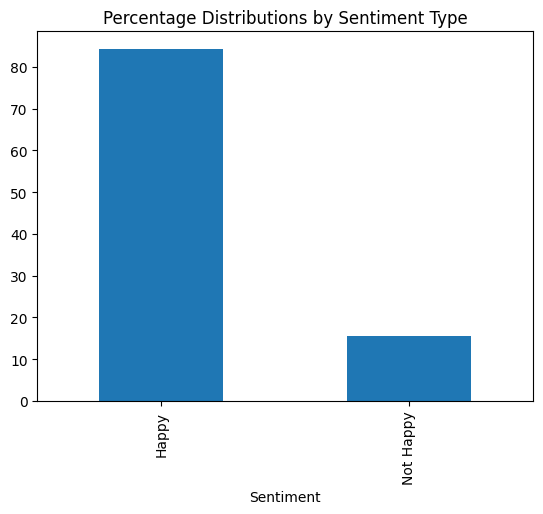

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming 3 or higher is considered 'Happy'
data['Sentiment'] = data['Rating'].apply(lambda x: 'Happy' if x >= 3 else 'Not Happy')

# Make sure the data column name is correct
print('Percentage for default sentiment')
print(round(data['Sentiment'].value_counts(normalize=True) * 100, 2))

# Plot the distribution
round(data['Sentiment'].value_counts(normalize=True) * 100, 2).plot(kind='bar')
plt.title('Percentage Distributions by Sentiment Type')
plt.show()


In [25]:
# Checking column names
print(data.columns)

# Drop specified columns if they exist
columns_to_drop = ['User_Id', 'Browser_Used', 'Device_Used']

if all(col in data.columns for col in columns_to_drop):
    data.drop(columns=columns_to_drop, inplace=True)
    print("Columns dropped successfully.")
else:
    print("One or more columns not found.")



Index(['Review', 'Rating', 'Sentiment'], dtype='object')
One or more columns not found.


In [27]:
#apply first level cleaning
import re
import string
#this function converts to lower case,removes square bracket,removes nos. and punctuation
def text_clean(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text
cleaned1=lambda x: text_clean(x)

In [30]:
# Checking column names
print(data.columns)

# Replace 'Description' with the correct column name in the following line
data['cleaned_description'] = pd.DataFrame(data['Sentiment'].apply(cleaned1))
data.head(10)


Index(['Review', 'Rating', 'Sentiment'], dtype='object')


,Review,Rating,Sentiment,cleaned_description
0,nice hotel expensive parking got good deal sta...,4,Happy,happy
1,ok nothing special charge diamond member hilto...,2,Not Happy,not happy
2,nice rooms not 4* experience hotel monaco seat...,3,Happy,happy
3,"unique, great stay, wonderful time hotel monac...",5,Happy,happy
4,"great stay great stay, went seahawk game aweso...",5,Happy,happy
5,love monaco staff husband stayed hotel crazy w...,5,Happy,happy
6,"cozy stay rainy city, husband spent 7 nights m...",5,Happy,happy
7,"excellent staff, housekeeping quality hotel ch...",4,Happy,happy
8,"hotel stayed hotel monaco cruise, rooms genero...",5,Happy,happy
9,excellent stayed hotel monaco past w/e delight...,5,Happy,happy


In [34]:
# Import the necessary library
from sklearn.model_selection import train_test_split

# Rest of your code
independent_var = data['cleaned_description']
dependent_var = data['Sentiment']

# Rest of your code remains unchanged
IV_train, IV_test, DV_train, DV_test = train_test_split(independent_var, dependent_var, test_size=0.1, random_state=225)
print('IV Train:', len(IV_train))
print('IV_test:', len(IV_test))
print('DV_train:', len(DV_train))
print('DV_test:', len(DV_test))



IV Train: 18441
IV_test: 2050
DV_train: 18441
DV_test: 2050


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver="lbfgs")
from sklearn.pipeline import Pipeline


In [38]:
model=Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(IV_train,DV_train)
from sklearn.metrics import confusion_matrix
predictions=model.predict(IV_test)
confusion_matrix(predictions,DV_test)

array([[1735,    0],
       [   0,  315]])

In [39]:
#model prediction
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("Accuracy:",accuracy_score(predictions,DV_test))
print("Precision:",precision_score(predictions,DV_test,average='weighted'))
print("Recall:",recall_score(predictions,DV_test,average='weighted'))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [40]:
# trying on new reviews
example=["I'm satisfied"]
result=model.predict(example)
print(result)

['Happy']
